In [189]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [376]:
def get_result(run_id, unit_idx):
    api = wandb.Api()
    run = api.run(f'sinzlab/egg/{run_id}')
    history = run.history()

    dime = history.query(f'unit_idx == {unit_idx}')

    # download image
    filename = dime.image[0]['path']
    file = run.file(filename)
    filename = file.download(exist_ok=True).name
    image = Image.open(filename)
    image = np.array(image)

    return image, dime.train[0]

def get_scores(run_id):
    api = wandb.Api()
    run = api.run(f'sinzlab/egg/{run_id}')
    history = run.history(samples=2000)

    return history

history = get_scores('m4uaksp7')

In [377]:
idx = history.groupby(['unit_idx', 'energy_scale'])['val'].idxmin()
menis = history.loc[idx, ['seed', 'energy_scale', 'unit_idx', 'train', 'val', 'cross-val', 'image']]

max_vals = menis.query('energy_scale == 10').groupby('unit_idx')['val'].max()
menis['val'] = menis['val'] / menis['unit_idx'].map(max_vals)

In [32]:
api = wandb.Api()
run = api.run(f'sinzlab/egg/pga7ddwq')

np.random.seed(3)
units = np.random.choice(menis['unit_idx'].unique(), 2).tolist()

units = [227, 821, 1176, 1017, 963, 425, 83, 1111]

meni_imgs = []
for unit_idx in units:
    images = menis.query(f'unit_idx == {unit_idx}')
    imgs = []
    for image in images.iterrows():
        filename = image[1].image['path']
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

[821, 1111]
4
4
4
4
4
4
4
4


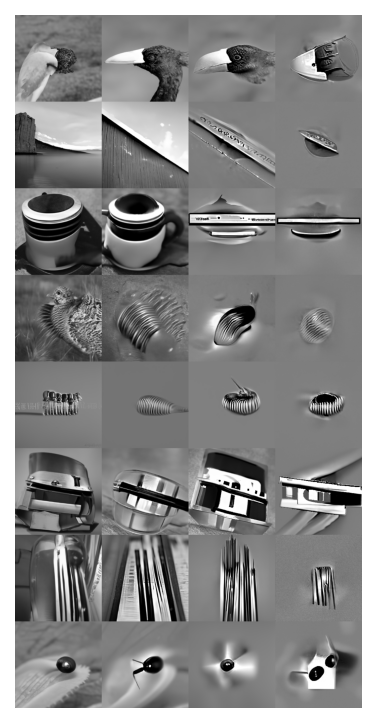

In [33]:
plt.figure(figsize=(20, 6), dpi=150)#, facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig('./menis.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

In [38]:
np.random.seed(5)
units = np.random.choice(menis['unit_idx'].unique(), 3).tolist()

units = [1025, 1093, 809, 286, 805] + units

meni_imgs = []
for unit_idx in units:
    images = menis.query(f'unit_idx == {unit_idx}')
    imgs = []
    for image in images.iterrows():
        filename = image[1].image['path']
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

[778, 964, 1192]
4
4
4
4
4
4
4
4


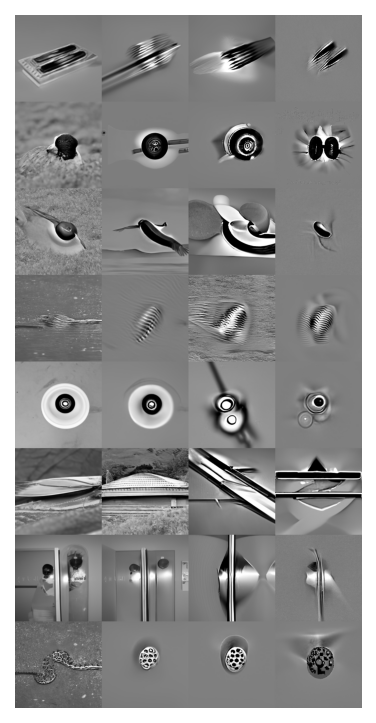

In [39]:
plt.figure(figsize=(20, 6), dpi=150)#, facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig('./menis_2.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

In [379]:
api = wandb.Api()
run = api.run(f'sinzlab/egg/pga7ddwq')

np.random.seed(40)
units = np.random.choice(menis['unit_idx'].unique(), 8).tolist()

meni_imgs = []
for unit_idx in units:
    images = menis.query(f'unit_idx == {unit_idx}')
    print(len(images))
    imgs = []
    for image in images.iterrows():
        filename = image[1].image['path']
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

[437, 24, 286, 48, 438, 933, 94, 490]
4
4
4
4
4
4
4
4


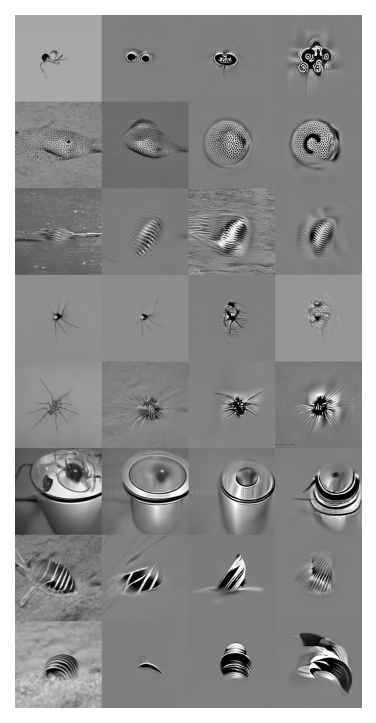

In [380]:
plt.figure(figsize=(20, 6), dpi=150)#, facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig('./menis_3.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

In [381]:
history = get_scores('st6ym3wn')

idx = history.groupby(['unit_idx', 'energy_scale'])['val'].idxmin()
menis = history.loc[idx, ['seed', 'energy_scale', 'unit_idx', 'train', 'val', 'cross-val', 'image']]

max_vals = menis.query('energy_scale == 10').groupby('unit_idx')['val'].max()
menis['val'] = menis['val'] / menis['unit_idx'].map(max_vals)

In [384]:
api = wandb.Api()
run = api.run(f'sinzlab/egg/st6ym3wn')
np.random.seed(20)
units = np.random.choice(menis['unit_idx'].unique(), 8).tolist()

meni_imgs = []
for unit_idx in units:
    images = menis.query(f'unit_idx == {unit_idx}')
    print(len(images))
    if len(images) != 4:
        continue
    imgs = []
    for image in images.iterrows():
        filename = image[1].image['path']
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

4
4
4
4
4
4
4
4


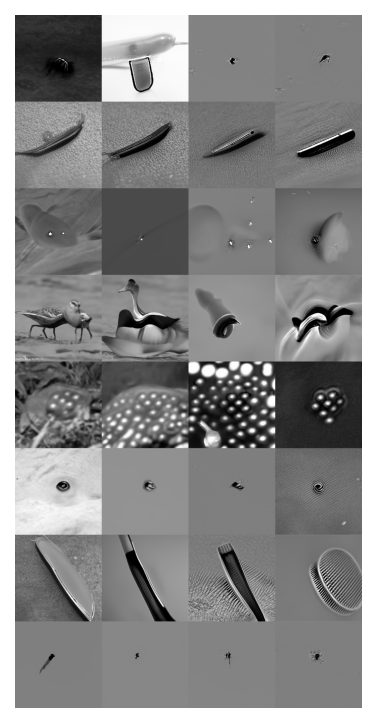

In [385]:
plt.figure(figsize=(20, 6), dpi=150)#, facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig('./menis_attn_sup_2.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

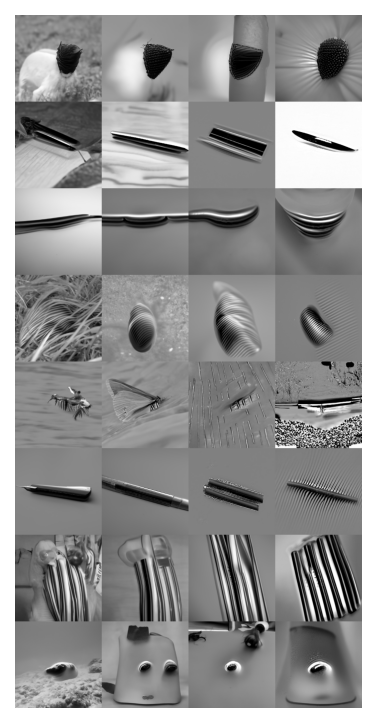

In [370]:
plt.figure(figsize=(20, 6), dpi=150)#, facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig('./menis_attn.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

360


/var/folders/l0/5z9p4hy52cb1qp1y62gb48sw0000gn/T/ipykernel_15991/42359506.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mu_att = menis.groupby('energy_scale').mean()['val']
/var/folders/l0/5z9p4hy52cb1qp1y62gb48sw0000gn/T/ipykernel_15991/42359506.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  se_at = menis.groupby('energy_scale').std()['val'] / np.sqrt(150)


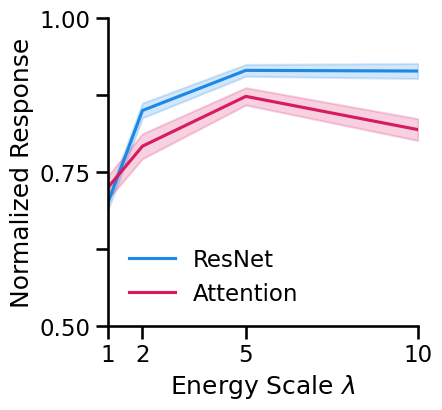

In [374]:
idx = history.groupby(['unit_idx', 'energy_scale'])['train'].idxmin()
menis = history.loc[idx, ['seed', 'energy_scale', 'unit_idx', 'train', 'val', 'cross-val', 'image']]
menis['val'] = -menis['val']

max_vals = menis.groupby('unit_idx')['val'].max()
menis['val'] = menis['val'] / menis['unit_idx'].map(max_vals)

menis['cross-val'] = -menis['cross-val']
max_vals = menis.groupby('unit_idx')['cross-val'].max()

mu_att = menis.groupby('energy_scale').mean()['val']
se_at = menis.groupby('energy_scale').std()['val'] / np.sqrt(150)

sns.set_context('talk')
plt.figure(figsize=(4, 4))
plt.plot(mu.index, mu.to_numpy(), c=palettes['candy']['blue'], label='ResNet')
plt.fill_between(mu.index, mu.to_numpy() + se.to_numpy(), mu.to_numpy() - se.to_numpy(), color=palettes['candy']['blue'], alpha=0.2)

plt.plot(mu_att.index, mu_att.to_numpy(), c=palettes['candy']['pink'], label='Attention')
plt.fill_between(mu_att.index, mu_att.to_numpy() + se_at.to_numpy(), mu_att.to_numpy() - se_at.to_numpy(), color=palettes['candy']['pink'], alpha=0.2)

plt.xlim(1, 10)
plt.ylim(0.5, 1)

plt.yticks([0.5, 0.625, 0.75, 0.875, 1], ["0.50", "", "0.75", "", "1.00"])
plt.xticks([1, 2, 5, 10])

plt.xlabel('Energy Scale $\lambda$')
plt.ylabel('Normalized Response')

sns.despine(trim=True)
plt.legend(frameon=False)
plt.savefig('./menis_activations.png', dpi=150, bbox_inches='tight')
plt.show()


[796, 731, 82]
4
4
4


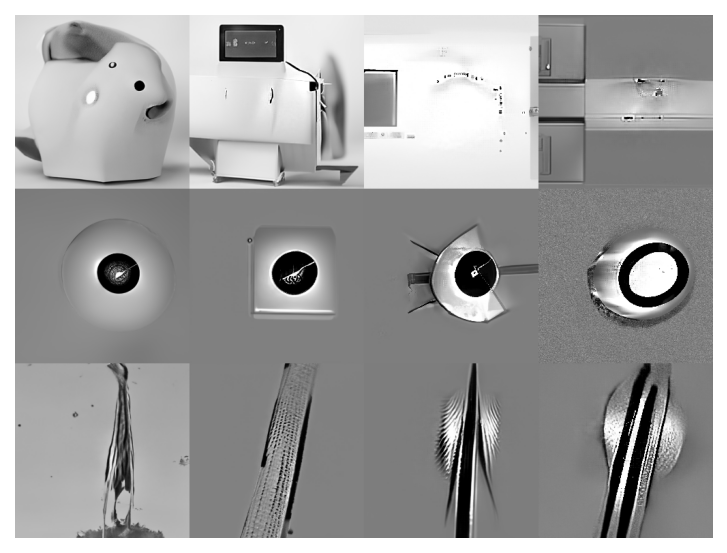

In [197]:
api = wandb.Api()
run = api.run(f'sinzlab/egg/pga7ddwq')

np.random.seed(42)
units = np.random.choice(menis['unit_idx'].unique(), 3).tolist()

units = units

meni_imgs = []
for unit_idx in units:
    images = menis.query(f'unit_idx == {unit_idx}')
    imgs = []
    for image in images.iterrows():
        filename = image[1].image['path']
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig('./menis_examples.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

[286]
(768, 1024, 3)


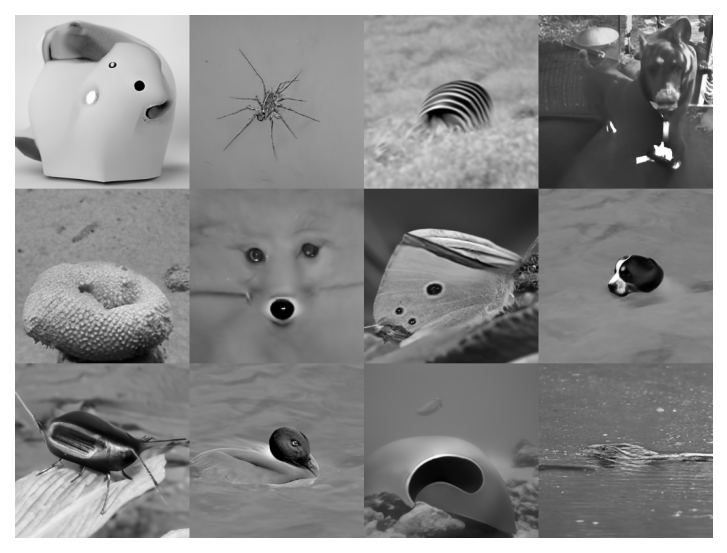

In [261]:
api = wandb.Api()
run = api.run(f'sinzlab/egg/m4uaksp7')

np.random.seed(5)
units = np.random.choice(history['unit_idx'].unique(), 1).tolist()
print(units)

units = [796, 438, 490, 946, 747, 201, 1179, 1119, 161, 432, 200, 286]

meni_imgs = []
for unit_idx in units:
    images = menis.query(f'unit_idx == {unit_idx}').query('energy_scale == 1')
    imgs = []
    for image in images.iterrows():
        filename = image[1].image['path']
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.array(meni_imgs)
meni_imgs = meni_imgs.reshape(3, 4, 256, 256, 3)
meni_imgs = np.hstack(meni_imgs)
meni_imgs = np.hstack(meni_imgs)

plt.figure(figsize=(6, 6), dpi=150)#, facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig('./menis_examples.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

In [2]:
import torch
import deeplake
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

/Users/paul/PycharmProjects/guided-diffusion/venv/lib/python3.9/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.4.1) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [4]:
ds = deeplake.load(('hub://sinzlab/imagenet_and_responses_5M'))

/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/imagenet_and_responses_5M



/

hub://sinzlab/imagenet_and_responses_5M loaded successfully.



In [5]:
n_images = 100_000
resps = []
for i, sample in tqdm(enumerate(ds)):
    if i == 100_000:
        break
    resps.append(sample.responses.numpy())

100000it [01:00, 1640.82it/s]


In [6]:
resps = np.stack(resps)

In [7]:
from lib.nnvision.nnvision.models.trained_models.v4_data_driven import \
    v4_multihead_attention_ensemble_model

v4_multihead_attention_ensemble_model.eval();

tform = transforms.Compose([
    transforms.ToTensor(), # Must convert to pytorch tensor for subsequent operations to run
    transforms.Normalize([0.4876], [0.2756,]), # images are grayscale, mean and std are taken from our actual monkey data
])

neuron_idx = np.load('./pretrained_resnet_unit_correlations.npy').argsort()[::-1][:150]
n_top_images = 1

img_indices = np.concatenate([np.argsort(resps[:, i])[-n_top_images:] for i in neuron_idx])

responses = [torch.Tensor(ds.responses[int(i)].numpy()) for i in img_indices]
responses = [r[i] for r, i in zip(responses, neuron_idx)]

images = torch.stack([tform(ds.images[int(i)].numpy()) for i in img_indices])

scores = []
for i, n in zip(images, neuron_idx):
    score = v4_multihead_attention_ensemble_model(i.unsqueeze(0), data_key='all_sessions')[:, n].item()

    scores.append(score)

[2023-05-11 22:41:19,353][INFO]: Connecting @localhost:3306


datajoint connection not established, skipping model imports from nnfabrik tables


[2023-05-11 22:41:20,835][INFO]: Connecting @localhost:3306


datajoint connection not established, skipping model imports from nnfabrik tables


In [22]:
norms = (torch.norm(images, dim=(2, 3)).squeeze().numpy())
np.save('./natural_norms.npy', np.stack([norms, neuron_idx]))

norm = np.stack([norms, neuron_idx])
print(norm[0, norm[1] == neuron_idx[0]])

[148.81259155]


In [109]:
import seaborn as sns

def plot(x, y, ax=None, c='#1E88E5'):
    if ax is None:
        ax = plt.gca()

    coeff = (x @ y + 1) / (x @ x + 1)
    ax.plot([0, 60], [0, 60], c='tab:gray', ls='--', lw=2)
    ax.plot([0, 60], [0, 60 * coeff], c='k', ls='-', lw=2)
    ax.scatter(x, y, c=c, zorder=10)#, edgecolor='k', linewidth=2, zorder=10)
    ax.axis('equal')
    ax.text(15, 35, f"$y(x) = {coeff:.2f}x$")

    sns.despine(trim=True)

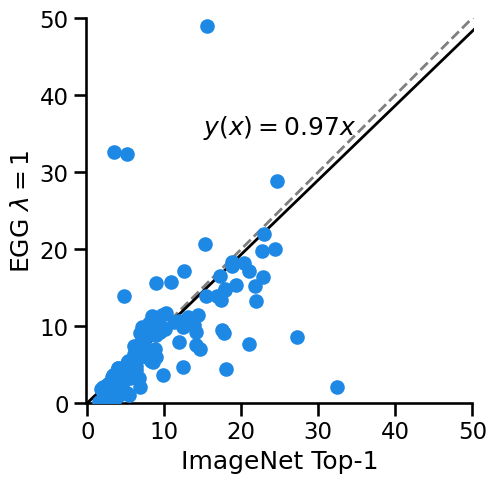

In [259]:
sns.set_context('talk')
plt.figure(figsize=(5, 5))
plot(np.array(scores)[np.array(neuron_idx).argsort()], menis.query('energy_scale == 1')['cross-val'], c=palettes['candy']['blue'])
plt.xlim(0, 50)
plt.ylim(0, 50)

plt.xticks([0, 10, 20, 30, 40, 50])
plt.yticks([0, 10, 20, 30, 40, 50])

plt.xlabel('ImageNet Top-1')
plt.ylabel('EGG $\lambda = 1$')

sns.despine(trim=True)
plt.savefig('./egg_vs_imagenet.png', dpi=150, bbox_inches='tight')

In [51]:
np.median(np.array(scores)), np.median(-menis.query('energy_scale == 1')['cross-val'])

(6.5736083984375, 5.538923740386963)

In [178]:
np.mean(np.array(scores)), np.mean(-menis.query('energy_scale == 1')['cross-val'])

(8.846704823970795, -9.286347575436036)

In [400]:
import scipy.stats as st

In [401]:
st.ttest_1samp(-menis.query('energy_scale == 1')['cross-val'] / np.array(scores)[np.array(neuron_idx).argsort()], popmean=1)

TtestResult(statistic=0.6287283983334655, pvalue=0.5304895397285881, df=149)